## Model Selection using RFE (Housing Case Study)

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [40]:
# Importing Housing.csv
df = pd.read_csv('Housing.csv')

In [41]:
# Looking at the first five rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Preparation

In [19]:
# list of categorical columns
for i in list(set(df.columns)-set(df.describe().columns)):
    print(df[i].value_counts())
    print('='*70)
    
print(list(set(df.columns)-set(df.describe().columns)))

yes    468
no      77
Name: mainroad, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64
['mainroad', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'prefarea', 'furnishingstatus']


In [42]:
# List of variables to map
varlist  = ['mainroad', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'prefarea']


# Defining the map function
f = lambda x:x.map({'yes':1, 'no':0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(f)

In [43]:
# Check the housing dataframe now

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [44]:
# short method
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [45]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [46]:
#rename the two columns

df.rename({'furnishingstatus_semi-furnished':'semi-furnished', 'furnishingstatus_unfurnished':'unfurnished'}, axis=1, inplace=True)

In [7]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'



# Check what the dataset 'status' looks like


,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [8]:
# Let's drop the first column from status df using 'drop_first = True'


# Add the results to the original housing dataframe


# Now let's see the head of our dataframe.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [9]:
# Drop 'furnishingstatus' as we have created the dummies for it


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Splitting the Data into Training and Testing Sets

In [47]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

### Rescaling the Features 

We will use MinMax scaling.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


### Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)
             
rfe = RFE(lr, n_features_to_select=10)    # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False])

In [59]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 2])

In [65]:
# columns selected by rfe
col = X_train.columns[rfe.support_]
col

## X_train.loc[:, rfe.support_].columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [66]:
# columns discarded by rfe
X_train.columns[~rfe.support_]

## list(set(X_train.columns)-set(X_train.loc[:, rfe.support_].columns))

['unfurnished', 'semi-furnished', 'basement']

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

### Building model using statsmodel, for the detailed statistics

In [70]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [76]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# define linearmodel func
def build_model(X,y):
    X = sm.add_constant(X)  # adding the constant
    lm = sm.OLS(y,X).fit()  # fitting the model
    print(lm.summary())   # model summary
    return X

# define VIF func
def checkVIF(X):
    vif = pd.DataFrame() # empty df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return(vif)

In [81]:
X_train_new = build_model(X_train_rfe, y_train)  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Tue, 31 May 2022   Prob (F-statistic):           1.28e-82
Time:                        09:20:32   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

In [82]:
# calculating VIF
checkVIF(X_train_new)

,Features,VIF
0,const,14.67
1,area,1.36
4,stories,1.36
2,bedrooms,1.33
3,bathrooms,1.25
8,airconditioning,1.23
9,parking,1.23
5,mainroad,1.17
10,prefarea,1.13
6,guestroom,1.08


`Bedrooms` is insignificant in presence of other variables; can be dropped

In [83]:
X_train_new = X_train_rfe.drop(['bedrooms'], axis =1)

Rebuilding the model without `bedrooms`

In [84]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 31 May 2022   Prob (F-statistic):           6.67e-83
Time:                        09:22:06   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [86]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [85]:
# Calculate the VIFs for the new model
checkVIF(X_train_new)

,Features,VIF
0,const,8.18
1,area,1.36
7,airconditioning,1.23
8,parking,1.22
2,bathrooms,1.19
3,stories,1.19
4,mainroad,1.16
9,prefarea,1.13
5,guestroom,1.08
6,hotwaterheating,1.07


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

In [87]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

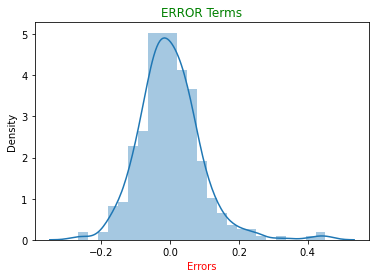

In [91]:
# Plot the histogram of the error terms
res = y_train - y_train_pred

sns.distplot(res)
plt.title('ERROR Terms', color='g')                  # Plot heading 
plt.xlabel('Errors', color='r')                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [92]:
num_vars

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [93]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [94]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


#### Dividing into X_test and y_test

In [95]:
y_test = df_test.pop('price')
X_test = df_test

In [96]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [99]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

In [100]:
X_test_new.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [101]:
# dropping variables from X_test_new
X_test_new = X_test_new[X_train_new.columns]

In [102]:
X_test_new.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,1.0,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0.333333,1
244,1.0,0.306582,0.0,0.333333,1,1,0,0,0.000000,1
268,1.0,0.274023,0.0,0.333333,1,0,0,1,0.000000,0


In [103]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

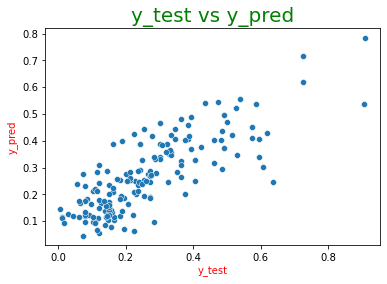

In [106]:
# Plotting y_test and y_pred to understand the spread.
sns.scatterplot(y_test, y_test_pred)
plt.title('y_test vs y_pred', fontsize=20, color='g') # Plot heading 
plt.xlabel('y_test', color='r')                          # X-label
plt.ylabel('y_pred', color='r')                         # Y-label